# ADP algorihtm 
- The goal of this file is to first learn how does the ADP work on a simple example and then use it to solve the problem of gas power plant valuation. 

- First, I will setup a simple example of three states and two actions. Each of the two actions changes the probability distributions of results and "costs" some reward. 
    - I will compute the optimal strategy for this example with real dynamic programming and then with the approximative dynamic programming. 
    - I will make heuristic strategies as well. 

In [1]:
import numpy as np

In [2]:
def get_action_from_strategy(strategy, state, time_epoch): 
    return(strategy(state, time_epoch))

In [3]:
def heuristic_strategy_1(state, time_epoch): 
    return(1)

In [4]:
def heuristic_strategy_0(state, time_epoch): 
    return(2)

In [5]:
def heuristic_strategy_2(state, time_epoch): 
    return(np.random.choice(np.arange(1, 3), p=[0.5,0.5]))

In [6]:
def optimal_strategy(state, time_epoch): 
    if state == 2: 
        return 1
    else: 
        return 2

## Three states two actions

In [7]:
prob_matrix = [[[0.3,0.4,0.3],[0.1,0.2,0.7]],
               [[0.2,0.2,0.6],[0.5,0.5,0]],
               [[0.3,0.1,0.6],[0.3,0.4,0.3]]]

In [8]:
reward_matrix = [[[2,5,3],[4,2,8]],
               [[12,15,14],[8,-3,3]],
               [[2,7,-4],[10,18,14]]]

In [9]:
prev_state = 2
action = 1

In [10]:
prob_matrix[prev_state-1][action-1]

[0.2, 0.2, 0.6]

In [11]:
time_epochs = 10 

In [12]:
def get_new_state(state, action): 
    return(np.random.choice(np.arange(1, 4), p=prob_matrix[state-1][action-1]))

In [13]:
def run_simulation(strategy): 
    state = 1
    reward = 0 
    for epoch in range(time_epochs): 
        
        action = get_action_from_strategy(strategy, state, epoch)
        new_state = get_new_state(state, action)
        reward += reward_matrix[state-1][action-1][new_state-1]
        
#         print(action)
#         print(new_state)
#         print(reward_matrix[state-1][action-1][new_state-1])
#         print()
        state = new_state
        
    return(reward)

In [14]:
strategies = [heuristic_strategy_0, 
              heuristic_strategy_1, 
              heuristic_strategy_2, 
              optimal_strategy]

In [15]:
run_simulation(optimal_strategy)

118

In [16]:
all_results = {}

for strategy in strategies: 
    strategy_results = {}
    for i in range(10000): 
        strategy_results[i] = run_simulation(strategy)
            
    all_results[strategy.__name__] = strategy_results 

In [17]:
import matplotlib.pyplot as plt 


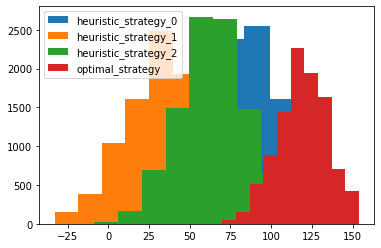

In [18]:
for strategy in strategies: 
    plt.hist(all_results[strategy.__name__].values(), label =strategy.__name__)
plt.legend()

In [19]:
for strategy in strategies: 
    print(np.mean(list(all_results[strategy.__name__].values())))

76.7402
35.4212
64.2866
118.929


## Now we have some idea what is going on
- We need to setup a dynamic program to obtain the best strategy. 

In [20]:
horizon_vf = [0,0,0]

In [21]:
prob_matrix[0]

[[0.3, 0.4, 0.3], [0.1, 0.2, 0.7]]

In [22]:
vf = {}
vf_prev_epoch = horizon_vf

strategy = {} 
for epoch in range(time_epochs): 
    vf_epoch = []
    epoch_strategy = {} 
    for state in range(3): 
        print(state)
        
        
        exp_1 = sum([i*j for i,j in zip(prob_matrix[state][0], [i+j for i,j in zip(reward_matrix[state][0], vf_prev_epoch)])]) 
        exp_2 = sum([i*j for i,j in zip(prob_matrix[state][1], [i+j for i,j in zip(reward_matrix[state][1], vf_prev_epoch)])])
#         print(exp_1)
#         print(exp_2)
#         print()
        
        epoch_strategy[state+1] = np.argmax([exp_1, exp_2])+1
        vf_epoch.append(np.max([exp_1, exp_2]))
    vf_prev_epoch = vf_epoch
    vf[time_epochs - epoch-1] = vf_epoch
    strategy[time_epochs - epoch-1] = epoch_strategy

0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2


In [23]:
vf

{9: [6.3999999999999995, 13.8, 14.399999999999999],
 8: [19.88, 26.48, 26.16],
 7: [31.995999999999995, 38.768, 38.804],
 6: [44.516, 51.2352, 51.1472],
 5: [56.90168, 63.63856, 63.593039999999995],
 4: [69.333008, 76.063872, 76.00384],
 3: [81.7487632, 88.48168, 88.4266032],
 2: [94.16983456, 100.90205055999999, 100.84528191999999],
 1: [106.58909091199999, 113.321546176, 113.26535516799999],
 0: [119.00896694399998, 125.7413405184, 125.6849522944]}

In [24]:
strategy

{9: {1: 2, 2: 1, 3: 2},
 8: {1: 2, 2: 1, 3: 2},
 7: {1: 2, 2: 1, 3: 2},
 6: {1: 2, 2: 1, 3: 2},
 5: {1: 2, 2: 1, 3: 2},
 4: {1: 2, 2: 1, 3: 2},
 3: {1: 2, 2: 1, 3: 2},
 2: {1: 2, 2: 1, 3: 2},
 1: {1: 2, 2: 1, 3: 2},
 0: {1: 2, 2: 1, 3: 2}}

In [25]:
def optimal_strategy(state, time_epoch): 
    if time_epoch <4 and state ==1: 
        return 1
    else: 
        return 2

In [26]:
[i+j for i,j in zip(reward_matrix[0][0], horizon_vf)]

[2, 5, 3]

In [27]:
sum([i*j for i,j in zip(prob_matrix[1-1][0], reward_matrix[0][0])])

3.5

In [28]:
reward_matrix[0]

[[2, 5, 3], [4, 2, 8]]